<a href="https://colab.research.google.com/github/ritikraushan57/Sentiment-Analysis/blob/main/Sentiment_analysis_using_twitter_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [35]:
import pandas as pd
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob

## Importing the Data and converting the sample data to a csv file

In [36]:
import pandas as pd

# Replace with actual correct path
df = pd.read_json(r"/content/Sample Data.txt", lines=True)

df.to_csv(r"/content/Sample Data.csv", index=False)


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Sunday, TheWorkingBoat, Falmouth]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars in #gayweho #redressparty #mick...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[gayweho, redressparty, mickysweho, Sunday, th...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God\nour week would be\nSINDAY\nMOURND...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[awesome, Attitude, Motivation, commitment, Su...",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02\n\...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Sunday],None


## Data Cleaning

In [39]:
df.fillna('', inplace=True)

/tmp/ipython-input-39-1272664119.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


In [40]:
df.shape

(5642, 28)

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Converting statement text to lowercase

In [42]:
df['content']=df['content'].str.lower()
df['content'].head()

,content
0,⭐ thank you ⭐\n\nour popular #sunday night pub...
1,ahhh big stars in #gayweho #redressparty #mick...
2,without god\nour week would be\nsinday\nmournd...
3,#awesome #attitude #motivation #commitment #su...
4,@badalonacc #sunday training with @omaree02\n\...


## Cleaning and removing the above stop words list from the text

In [11]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda text: cleaning_stopwords(text))
df['content'].head()

,content
0,⭐ thank ⭐ popular #sunday night pub quizzes hu...
1,ahhh big stars #gayweho #redressparty #mickysw...
2,without god week would sinday mournday tearsda...
3,#awesome #attitude #motivation #commitment #su...
4,@badalonacc #sunday training @omaree02 @cricke...


## Cleaning and removing punctuations

In [12]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].head()

,content
0,⭐ thank ⭐ popular sunday night pub quizzes hug...
1,ahhh big stars gayweho redressparty mickysweho...
2,without god week would sinday mournday tearsda...
3,awesome attitude motivation commitment sunday ...
4,badalonacc sunday training omaree02 cricketpun...


#### Cleaning and removing repeating characters

In [13]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].head()

,content
0,⭐ thank ⭐ popular sunday night pub quizzes hug...
1,ahhh big stars gayweho redressparty mickysweho...
2,without god week would sinday mournday tearsda...
3,awesome attitude motivation commitment sunday ...
4,badalonacc sunday training omaree02 cricketpun...


## Cleaning and removing URL’s

In [14]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].head()

,content
0,⭐ thank ⭐ popular sunday night pub quizzes hug...
1,ahhh big stars gayweho redressparty mickysweho...
2,without god week would sinday mournday tearsda...
3,awesome attitude motivation commitment sunday ...
4,badalonacc sunday training omaree02 cricketpun...


## Cleaning and removing Numeric numbers

In [15]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].head()

,content
0,⭐ thank ⭐ popular sunday night pub quizzes hug...
1,ahhh big stars gayweho redressparty mickysweho...
2,without god week would sinday mournday tearsda...
3,awesome attitude motivation commitment sunday ...
4,badalonacc sunday training omaree cricketpunt...


## Remove short words


In [16]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content'].head()

,content
0,thank popular sunday night pub quizzes huge su...
1,ahhh big stars gayweho redressparty mickysweho...
2,without god week would sinday mournday tearsda...
3,awesome attitude motivation commitment sunday ...
4,badalonacc sunday training omaree cricketpuntc...


## Getting tokenization of tweet text

In [17]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
df['content']=df['content'].apply(tt.tokenize)
df['content'].head()

,content
0,"[thank, popular, sunday, night, pub, quizzes, ..."
1,"[ahhh, big, stars, gayweho, redressparty, mick..."
2,"[without, god, week, would, sinday, mournday, ..."
3,"[awesome, attitude, motivation, commitment, su..."
4,"[badalonacc, sunday, training, omaree, cricket..."


# Applying Stemming

In [18]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['content']= df['content'].apply(lambda x: stemming_on_text(x))
df['content'].head()

,content
0,"[thank, popular, sunday, night, pub, quizzes, ..."
1,"[ahhh, big, stars, gayweho, redressparty, mick..."
2,"[without, god, week, would, sinday, mournday, ..."
3,"[awesome, attitude, motivation, commitment, su..."
4,"[badalonacc, sunday, training, omaree, cricket..."


## Applying Lemmatizer

In [19]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['content'] = df['content'].apply(lambda x: lemmatizer_on_text(x))
df['content'].head()

,content
0,"[thank, popular, sunday, night, pub, quizzes, ..."
1,"[ahhh, big, stars, gayweho, redressparty, mick..."
2,"[without, god, week, would, sinday, mournday, ..."
3,"[awesome, attitude, motivation, commitment, su..."
4,"[badalonacc, sunday, training, omaree, cricket..."


## Subjectivity and polarity

In [21]:
#create a function to get the subjectivity
def getSubjectivity(text):
    # Join the list of words into a single string using a space separator
    text = ' '.join(text)
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getpolarity(text):
    # Join the list of words into a single string using a space separator
    text = ' '.join(text)
    return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity']=df['content'].apply(getSubjectivity)
df['polarity']=df['content'].apply(getpolarity)

#show the new datafraem with the new columns
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, popular, sunday, night, pub, quizzes, ...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Sunday, TheWorkingBoat, Falmouth]",,0.464286,0.385714
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, stars, gayweho, redressparty, mick...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,,,,"[gayweho, redressparty, mickysweho, Sunday, th...",,0.100000,0.000000
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, week, would, sinday, mournday, ...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",,0.625000,-0.375000
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesome, attitude, motivation, commitment, su...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,,"[awesome, Attitude, Motivation, commitment, Su...",,1.000000,1.000000
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, training, omaree, cricket...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,[Sunday],,0.000000,0.000000


## Computing the negative, neutral and positive analysis

In [22]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

df['analysis']=df['polarity'].apply(getAnalysis)

#show dataFrame
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, popular, sunday, night, pub, quizzes, ...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Sunday, TheWorkingBoat, Falmouth]",,0.464286,0.385714,positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, stars, gayweho, redressparty, mick...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,,,"[gayweho, redressparty, mickysweho, Sunday, th...",,0.100000,0.000000,neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, week, would, sinday, mournday, ...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",,0.625000,-0.375000,negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesome, attitude, motivation, commitment, su...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[awesome, Attitude, Motivation, commitment, Su...",,1.000000,1.000000,positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, training, omaree, cricket...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,[Sunday],,0.000000,0.000000,neutral


In [23]:
# create two new dataframe all of the positive text
df_positive = df[df['analysis'] == 'positive']


# create two new dataframe all of the negative text
df_negative = df[df['analysis'] == 'negative']


# create two new dataframe all of the neutral text
df_neutral=df[df['analysis'] == 'neutral']


## Counting the number of positive, negative, neutral reviews.

In [24]:
tb_counts = df.analysis.value_counts()
tb_counts

,count
analysis,
neutral,2696
positive,2526
negative,420


##Visualizing all tweets

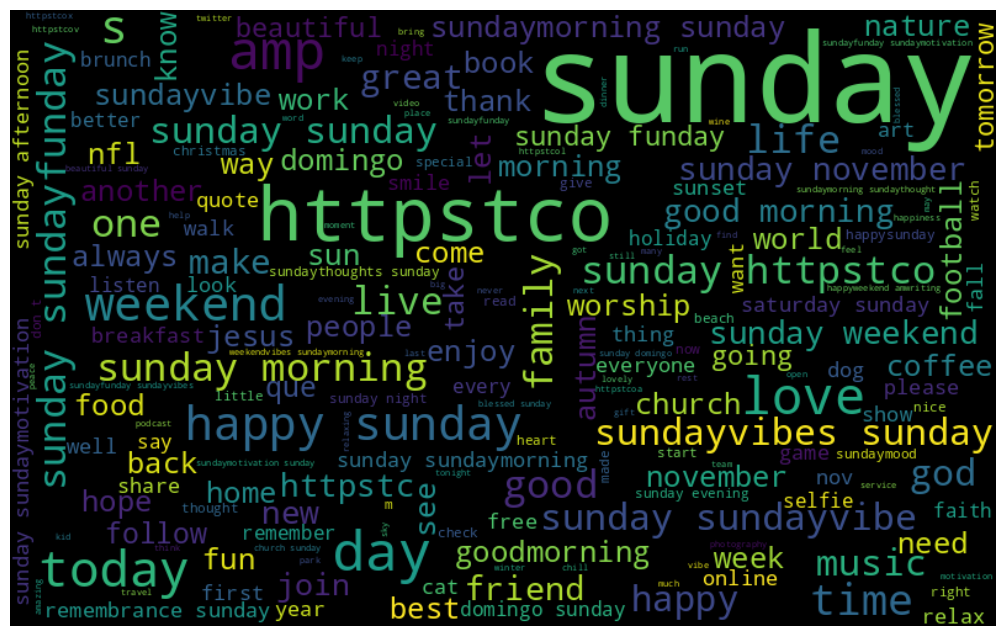

In [25]:
all_words = " ".join(" ".join(sent) for sent in df['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualizing all positive tweets

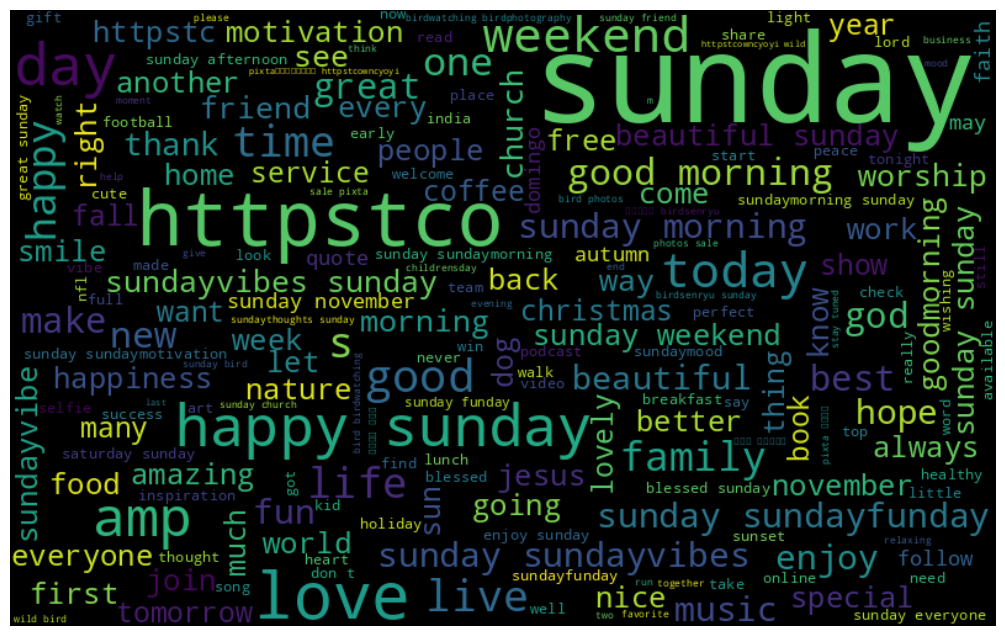

In [26]:
all_pos_words = " ".join(" ".join(sent) for sent in df_positive['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_pos_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualizing all negative tweets

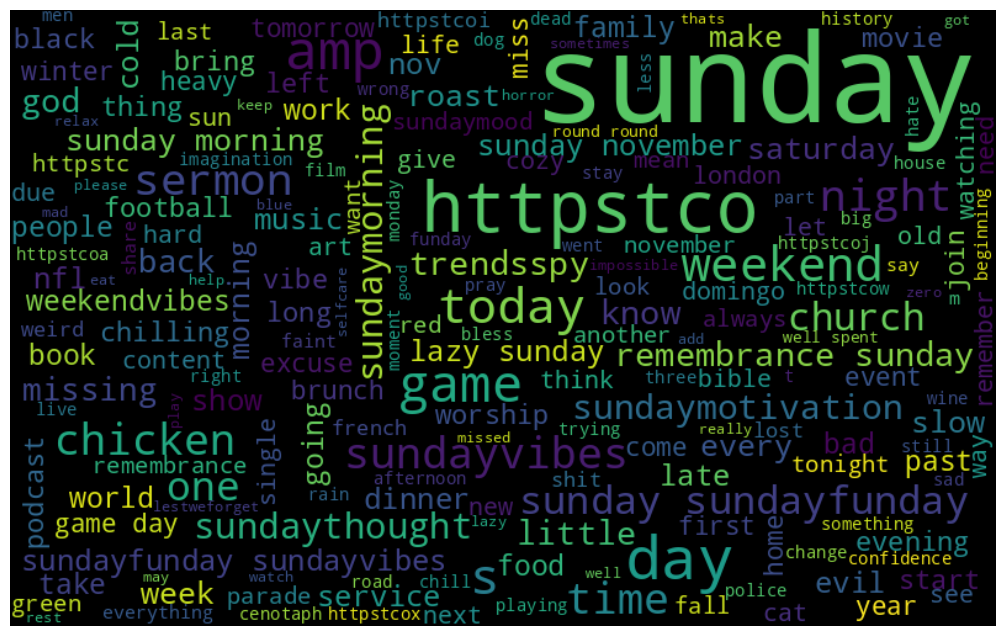

In [27]:
all_neg_words = " ".join(" ".join(sent) for sent in df_negative['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neg_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Visualizing all neutral tweets

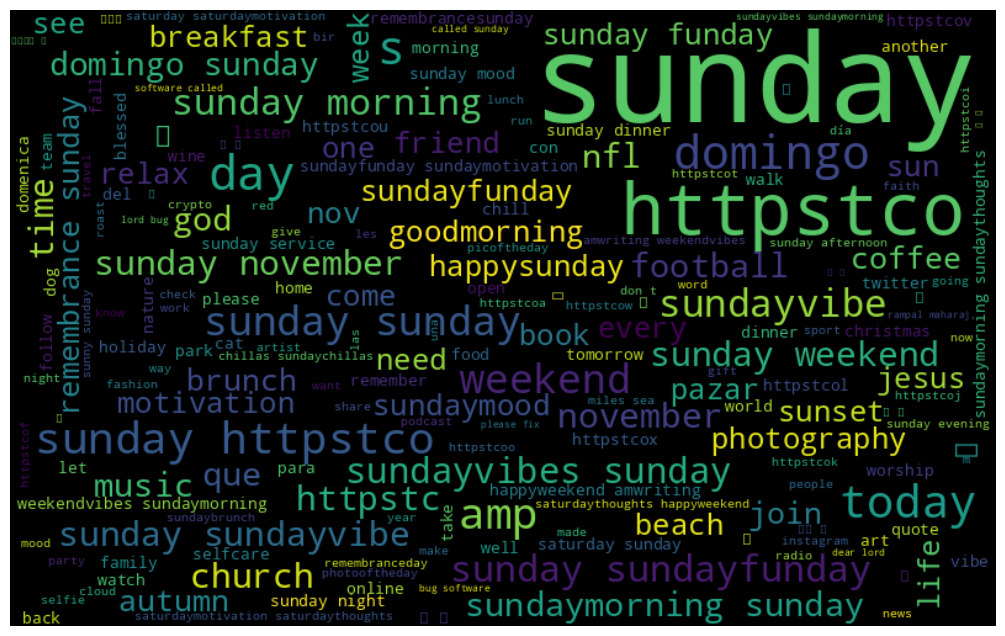

In [28]:
all_neu_words = " ".join(" ".join(sent) for sent in df_neutral['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neu_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Plotting the polarity and subjectivity

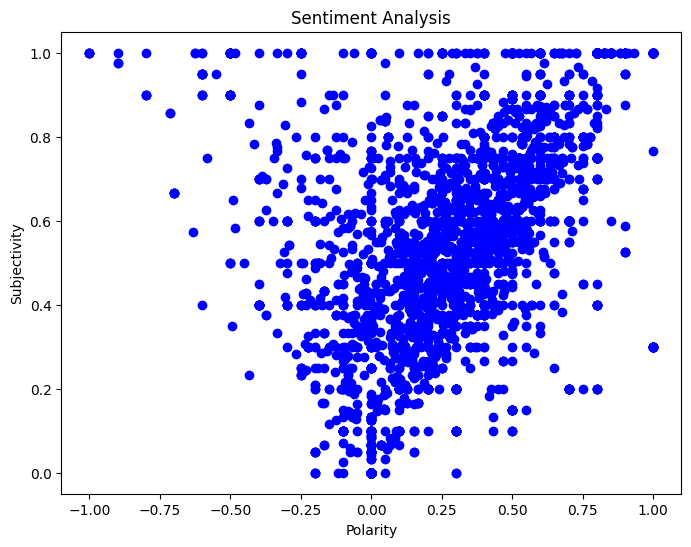

In [29]:

plt.figure(figsize=(8,6))
plt.scatter(df['polarity'], df['subjectivity'], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Calculating Percentage of positive, negative and neutral tweets

In [30]:
print("Positive tweets",round((df_positive.shape[0]/df.shape[0])*100,1),"%")
print("Negative tweets",round((df_negative.shape[0]/df.shape[0])*100,1),"%")
print("Neutral tweets",round((df_neutral.shape[0]/df.shape[0])*100,1),"%")

Positive tweets 44.8 %
Negative tweets 7.4 %
Neutral tweets 47.8 %


# Showing the value counts

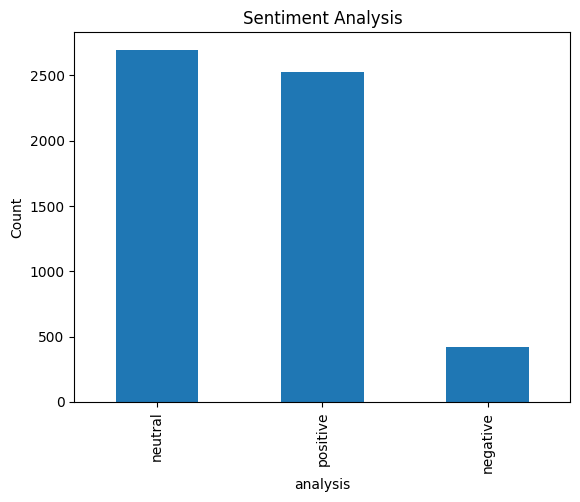

In [31]:
df['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['analysis'].value_counts().plot(kind='bar')
plt.show()